In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sns

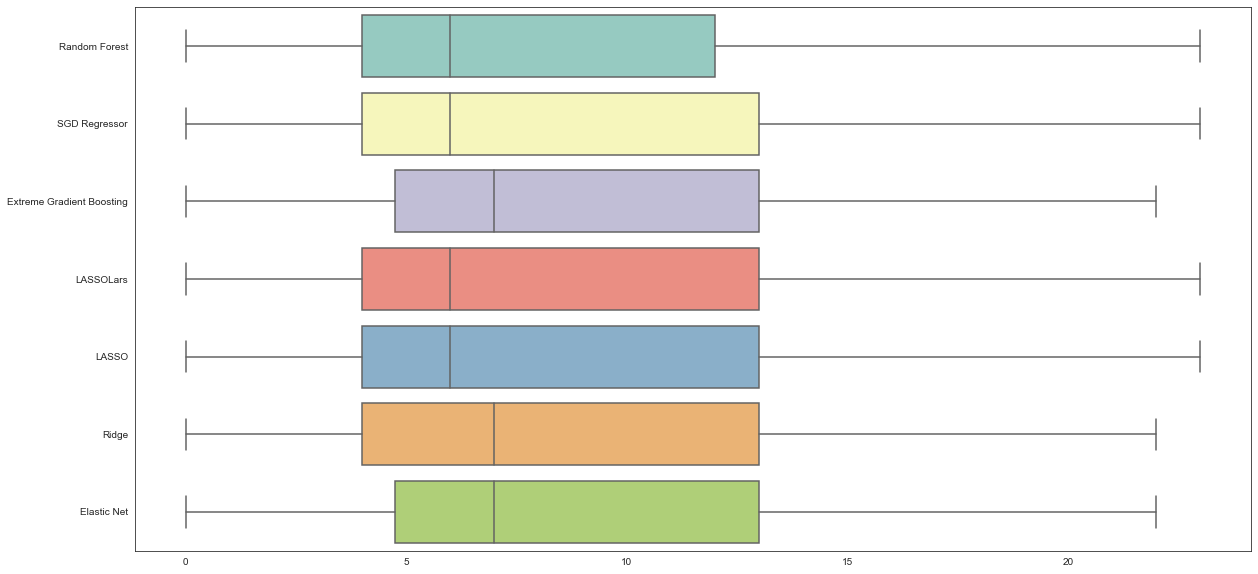

In [2]:
#Importing the model results - without any genetic data
df1=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/One Hot/Random Forest.csv" , delimiter=",")
res1=abs(df1["Predictions"]-df1["Ground truth"])

df2=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/One Hot/SGD.csv" , delimiter=",")
res2=abs(df2["Predictions"]-df2["Ground truth"])

#df3=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/One Hot/Linear.csv" , delimiter=",")
#res3=abs(df3["Predictions"]-df3["Ground truth"])

df4=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/One Hot/XGB.csv" , delimiter=",")
res4=abs(df4["Predictions"]-df4["Ground truth"])

df5=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/One Hot/LASSOLARS.csv" , delimiter=",")
res5=abs(df5["Predictions"]-df5["Ground truth"])

df6=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/One Hot/LASSO.csv" , delimiter=",")
res6=abs(df6["Predictions"]-df6["Ground truth"])

df7=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/One Hot/Ridge.csv" , delimiter=",")
res7=abs(df7["Predictions"]-df7["Ground truth"])

df8=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/One Hot/Elasticnet.csv" , delimiter=",")
res8=abs(df8["Predictions"]-df8["Ground truth"])

OneHot = pd.concat([res1, res2, res4, res5, res6, res7, res8], axis=1)
OneHot.columns = ['Random Forest', 'SGD Regressor', 'Extreme Gradient Boosting', 'LASSOLars',
             'LASSO', 'Ridge', 'Elastic Net']

#Creating boxplots
sns.set_style(style="white")
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data=OneHot, orient="h", palette="Set3")

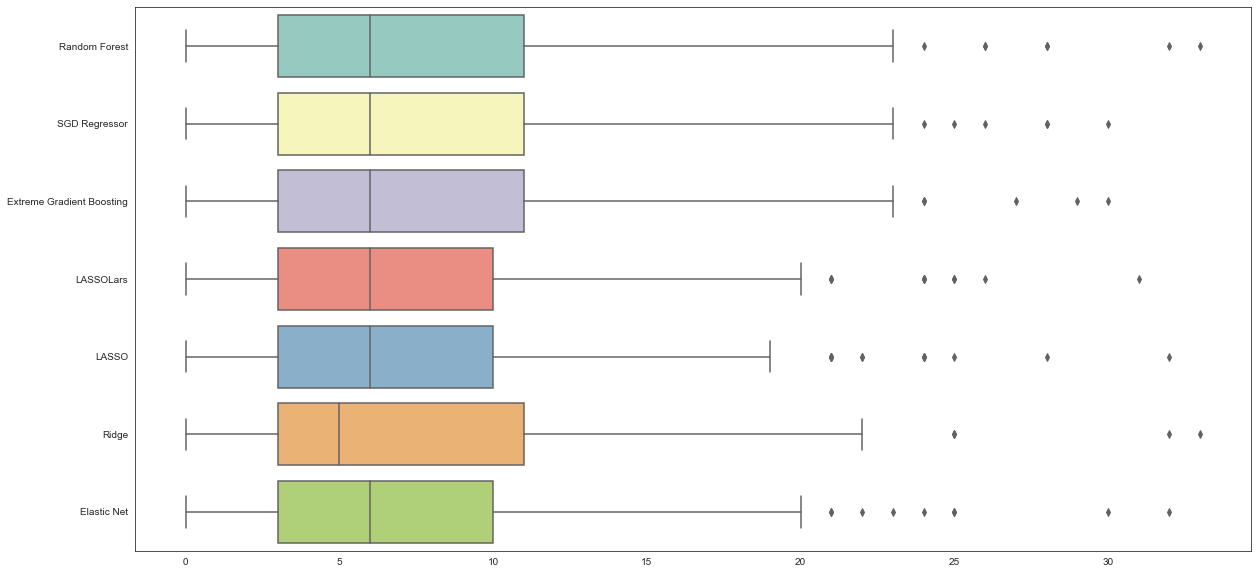

In [3]:
#Importing the model results - gene data filtered by entropy

df1=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/Cluster/Random Forest.csv" , delimiter=",")
res1=abs(df1["Predictions"]-df1["Ground truth"])

df2=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/Cluster/SGD.csv" , delimiter=",")
res2=abs(df2["Predictions"]-df2["Ground truth"])

#df3=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/Cluster/Linear.csv" , delimiter=",")
#res3=abs(df3["Predictions"]-df3["Ground truth"])

df4=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/Cluster/XGB.csv" , delimiter=",")
res4=abs(df4["Predictions"]-df4["Ground truth"])

df5=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/Cluster/LASSOLARS.csv" , delimiter=",")
res5=abs(df5["Predictions"]-df5["Ground truth"])

df6=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/Cluster/LASSO.csv" , delimiter=",")
res6=abs(df6["Predictions"]-df6["Ground truth"])

df7=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/Cluster/Ridge.csv" , delimiter=",")
res7=abs(df7["Predictions"]-df7["Ground truth"])

df8=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/Cluster/Elasticnet.csv" , delimiter=",")
res8=abs(df8["Predictions"]-df8["Ground truth"])
Clust = pd.concat([res1, res2, res4, res5, res6, res7, res8], axis=1)
Clust.columns = ['Random Forest', 'SGD Regressor', 'Extreme Gradient Boosting', 'LASSOLars',
             'LASSO', 'Ridge', 'Elastic Net']

#Creating boxplots
sns.set_style(style="white")
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data=Clust, orient="h", palette="Set3")

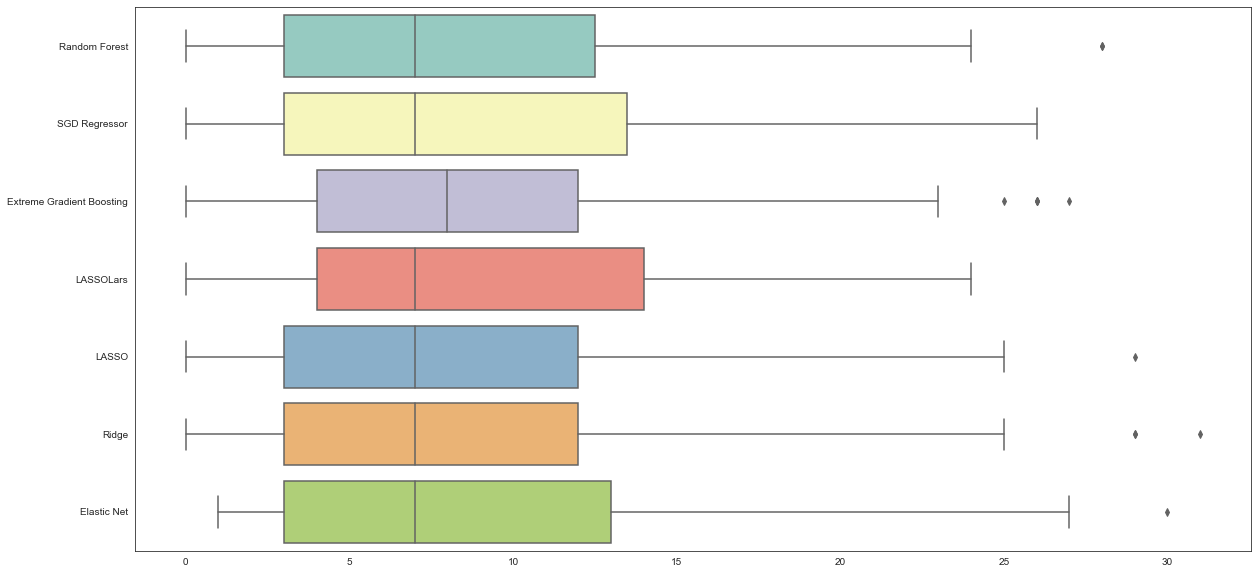

In [4]:
#Importing the model results - gene data filtered by GWAS
df1=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/distance/Random Forest.csv" , delimiter=",")
res1=abs(df1["Predictions"]-df1["Ground truth"])

df2=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/distance/SGD.csv" , delimiter=",")
res2=abs(df2["Predictions"]-df2["Ground truth"])

#df3=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/distance/Linear.csv" , delimiter=",")
#res3=abs(df3["Predictions"]-df3["Ground truth"])

df4=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/distance/XGB.csv" , delimiter=",")
res4=abs(df4["Predictions"]-df4["Ground truth"])

df5=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/distance/LASSOLARS.csv" , delimiter=",")
res5=abs(df5["Predictions"]-df5["Ground truth"])

df6=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/distance/LASSO.csv" , delimiter=",")
res6=abs(df6["Predictions"]-df6["Ground truth"])

df7=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/distance/Ridge.csv" , delimiter=",")
res7=abs(df7["Predictions"]-df7["Ground truth"])

df8=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/distance/Elasticnet.csv" , delimiter=",")
res8=abs(df8["Predictions"]-df8["Ground truth"])

GWAS = pd.concat([res1, res2, res4, res5, res6, res7, res8], axis=1)
GWAS.columns = ['Random Forest','SGD Regressor', 'Extreme Gradient Boosting', 'LASSOLars',
             'LASSO', 'Ridge', 'Elastic Net']

#Creating boxplots
sns.set_style(style="white")
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data=GWAS, orient="h", palette="Set3")

Text(0.5, 0, 'Residuals')

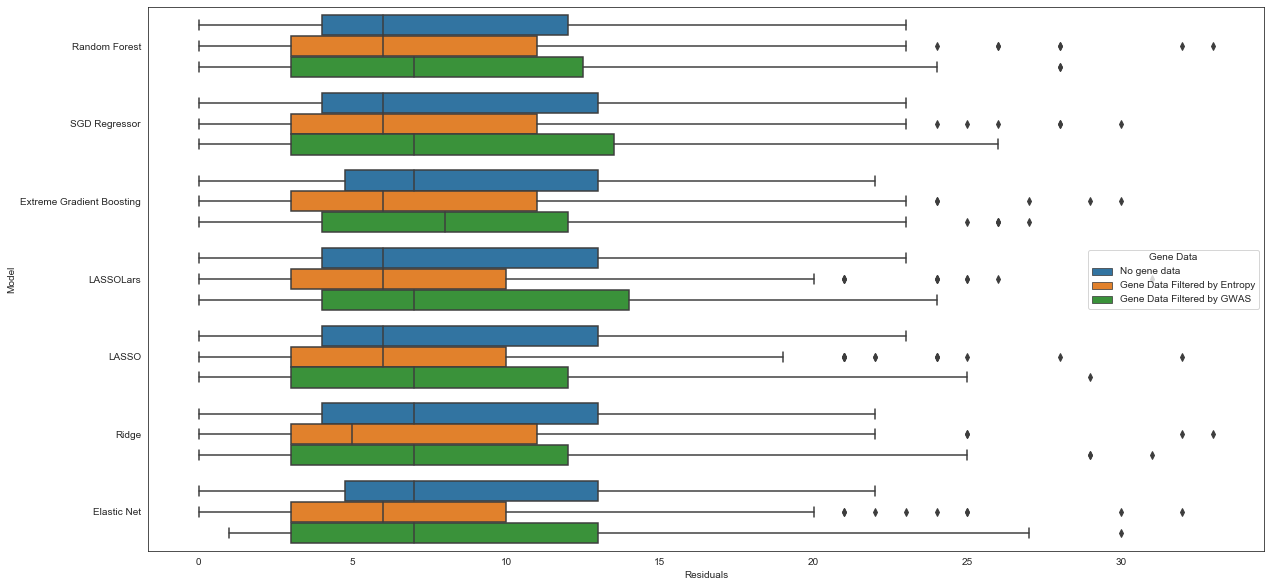

In [5]:
#Integrating all the boxplots obtained from the models
OneHot.loc[:,'Gene Data']= 'No gene data'
Clust.loc[:,'Gene Data']= 'Gene Data Filtered by Entropy'
GWAS.loc[:,'Gene Data']= 'Gene Data Filtered by GWAS'

new = OneHot.append(Clust, ignore_index=True)
dat=new.append(GWAS, ignore_index=True)

sns.set_style(style="white")
f, ax = plt.subplots(figsize=(20, 10))

cumul = pd.melt(dat, id_vars=['Gene Data'], var_name=['Model']) 
ax = sns.boxplot(x="value", y="Model", hue="Gene Data", data=cumul)  
plt.xlabel('Residuals')